In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import shutil
import array as arr

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rohanlimaye20","key":"198f207519dc2f20fce5deeb37af6b0e"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

ocular-disease-recognition-odir5k.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import os
import zipfile
local='/content/ocular-disease-recognition-odir5k.zip'
zipr=zipfile.ZipFile(local,'r')
zipr.extractall('/content')
zipr.close()

In [0]:
meta=pd.read_excel('/content/ODIR-5K/data.xlsx')

In [13]:
meta.head(25)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
8,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
9,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1


In [14]:
classes=["normal fundus",'retinopathy','glaucoma','cataract','age-related macular degeneration','hypertensive retinopathy','myopia']
for x in classes:
  print(x)

normal fundus
retinopathy
glaucoma
cataract
age-related macular degeneration
hypertensive retinopathy
myopia


NOTE:
age-related macular degeneration---stands for AMD


hypertensive retinopathy--- stands for hypertension

retinopathy ---stands for diabetes

In [15]:
to_create = [
    '/content/eye',
     '/content/eye/age-related macular degeneration',
     '/content/eye/cataract',
     '/content/eye/retinopathy',
     '/content/eye/glaucoma',
     '/content/eye/hypertensive retinopathy',
     '/content/eye/myopia',
      '/content/eye/normal fundus',
       '/content/eye/other',

]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

/content/eye created
/content/eye/age-related macular degeneration created
/content/eye/cataract created
/content/eye/retinopathy created
/content/eye/glaucoma created
/content/eye/hypertensive retinopathy created
/content/eye/myopia created
/content/eye/normal fundus created
/content/eye/other created


In [0]:
a = arr.array('i', [0, 0, 0,0,0,0,0,0]) 

In [0]:

for x,k in zip(meta['Left-Diagnostic Keywords'],meta['ID']):
 comma=x.count(chr(65292))
 path="/content/ODIR-5K/Training Images/"+ str(k) +"_left.jpg"
 m=0
 i=0  
 for j in classes: 
  if (x.count(j)>0):
   if(j=='retinopathy'):
     if(x.find("hypertensive retinopathy") != -1):
       if (x.count(j)>1):
         shutil.copy(path,'/content/eye/'+j)
         a[i]+=1
         m+=1
     else:
       shutil.copy(path,'/content/eye/'+j)
       a[i]+=1
       m+=1
   else:
     if(j=="normal fundus"):
       m+=1
       if(comma==0):
          shutil.copy(path,'/content/eye/'+j)
          a[i]+=1
       elif(comma==1):
         if(x.find("lens dust") != -1):
           shutil.copy(path,'/content/eye/'+j)
           a[i]+=1
     
     else:
      shutil.copy(path,'/content/eye/'+j)
      a[i]+=1
      m+=1
  i+=1 
 if(m<comma+1):
   if(x.find("lens dust") != -1):
     if(m<comma):
       shutil.copy(path,'/content/eye/other')
       a[7]+=1
   else:
    shutil.copy(path,'/content/eye/other')
    a[7]+=1
    

In [0]:
for x,k in zip(meta['Right-Diagnostic Keywords'],meta['ID']):
 comma=x.count(chr(65292))
 path="/content/ODIR-5K/Training Images/"+ str(k) +"_right.jpg"
 m=0
 i=0  
 for j in classes:
  if (x.count(j)>0):
   if(j=='retinopathy'):
     if(x.find("hypertensive retinopathy") != -1):
       if (x.count(j)>1):
         shutil.copy(path,'/content/eye/'+j)
         a[i]+=1
         m+=1
     else:
       shutil.copy(path,'/content/eye/'+j)
       a[i]+=1
       m+=1
   else:
     if(j=="normal fundus"):
       m+=1
       if(comma==0):
          shutil.copy(path,'/content/eye/'+j)
          a[i]+=1
       elif(comma==1):
         if(x.find("lens dust") != -1):
           shutil.copy(path,'/content/eye/'+j)
           a[i]+=1
     
     else:
      shutil.copy(path,'/content/eye/'+j)
      a[i]+=1
      m+=1
  i+=1 
 if(m<comma+1):
   if(x.find("lens dust") != -1):
     if(m<comma):
       shutil.copy(path,'/content/eye/other')
       a[7]+=1
   else:
    shutil.copy(path,'/content/eye/other')
    a[7]+=1

In [0]:
#shutil.rmtree('/content/eye', ignore_errors=True)

In [44]:
%matplotlib inline

from imutils import paths
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,AveragePooling2D,Dropout
from keras.optimizers import SGD,RMSprop,Adam


sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
imagePaths = sorted(list(paths.list_images('/content/eye')))
imagePaths

['/content/eye/amd/102_left.jpg',
 '/content/eye/amd/102_right.jpg',
 '/content/eye/amd/1043_left.jpg',
 '/content/eye/amd/1043_right.jpg',
 '/content/eye/amd/1064_left.jpg',
 '/content/eye/amd/1064_right.jpg',
 '/content/eye/amd/1065_left.jpg',
 '/content/eye/amd/1075_left.jpg',
 '/content/eye/amd/1085_left.jpg',
 '/content/eye/amd/1085_right.jpg',
 '/content/eye/amd/1091_left.jpg',
 '/content/eye/amd/1091_right.jpg',
 '/content/eye/amd/1098_left.jpg',
 '/content/eye/amd/1098_right.jpg',
 '/content/eye/amd/1104_left.jpg',
 '/content/eye/amd/1104_right.jpg',
 '/content/eye/amd/1111_left.jpg',
 '/content/eye/amd/1111_right.jpg',
 '/content/eye/amd/1125_left.jpg',
 '/content/eye/amd/1125_right.jpg',
 '/content/eye/amd/1154_left.jpg',
 '/content/eye/amd/1154_right.jpg',
 '/content/eye/amd/1168_right.jpg',
 '/content/eye/amd/1191_left.jpg',
 '/content/eye/amd/1196_left.jpg',
 '/content/eye/amd/1196_right.jpg',
 '/content/eye/amd/1197_left.jpg',
 '/content/eye/amd/1197_right.jpg',
 '/conten

In [0]:
images = []
labels = []

for i in imagePaths:
  image = cv2.imread(i)
  image = cv2.resize(image,(64,64))
  images.append(image)
  label = i.split(os.path.sep)[-2]
  labels.append(label)

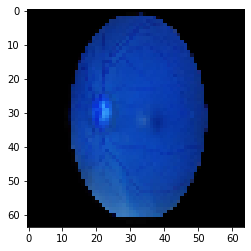

In [11]:
plt.imshow(images[2])

In [0]:
images = np.array(images , dtype='float') / 255.0
labels = np.array(labels)

In [15]:
images.shape

(7524, 64, 64, 3)

In [16]:
labels

array(['amd', 'amd', 'amd', ..., 'other', 'other', 'other'], dtype='<U12')

In [0]:
lb = LabelBinarizer()

In [0]:
(trainX,testX,trainY,testY) = train_test_split(images,labels,test_size=0.15,random_state=42)

In [22]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(6395, 64, 64, 3)
<class 'numpy.ndarray'>
(6395,)
<class 'numpy.ndarray'>
(1129, 64, 64, 3)
<class 'numpy.ndarray'>
(1129,)


In [0]:
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(64,64,3),activation='relu',padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(84,activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(8,activation='softmax'))

In [61]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              33555456  
_________________________________________________________________
dropout_20 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 84)              

In [0]:
INIT_LR = 1e-2
BS=32
EPOCHS = 50

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=["accuracy"])

In [63]:
H = model.fit(trainX,trainY,epochs=50,batch_size=32,validation_data=(testX,testY))

Train on 6395 samples, validate on 1129 samples
Epoch 1/50
6395/6395 [==============================] - 8s 1ms/step - loss: 1.8306 - accuracy: 0.3889 - val_loss: 1.6210 - val_accuracy: 0.3818
Epoch 2/50
6395/6395 [==============================] - 3s 451us/step - loss: 1.5984 - accuracy: 0.4127 - val_loss: 1.5747 - val_accuracy: 0.3977
Epoch 3/50
6395/6395 [==============================] - 3s 448us/step - loss: 1.5491 - accuracy: 0.4231 - val_loss: 1.5299 - val_accuracy: 0.4066
Epoch 4/50
6395/6395 [==============================] - 3s 450us/step - loss: 1.5077 - accuracy: 0.4288 - val_loss: 1.5095 - val_accuracy: 0.4057
Epoch 5/50
6395/6395 [==============================] - 3s 448us/step - loss: 1.4760 - accuracy: 0.4332 - val_loss: 1.5125 - val_accuracy: 0.3995
Epoch 6/50
6395/6395 [==============================] - 3s 444us/step - loss: 1.4359 - accuracy: 0.4436 - val_loss: 1.4876 - val_accuracy: 0.4119
Epoch 7/50
6395/6395 [==============================] - 3s 446us/step - loss: 

## MAJOR OVERFITTING 

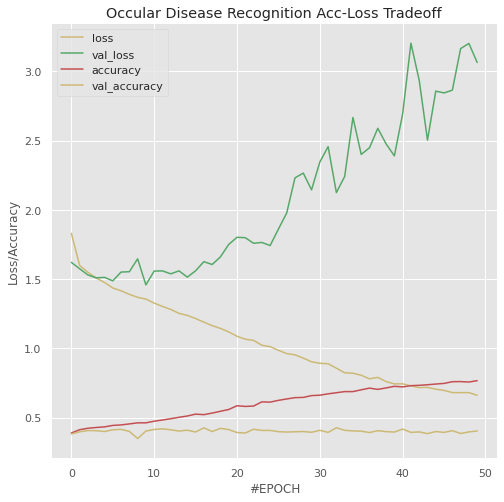

In [65]:
N = np.arange(0,EPOCHS)
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.plot(N,H.history['loss'],'y',label='loss')
plt.plot(N,H.history['val_loss'],'g',label='val_loss')
plt.plot(N,H.history['accuracy'],'r',label='accuracy')
plt.plot(N,H.history['val_accuracy'],'y',label='val_accuracy')
plt.legend()
plt.xlabel('#EPOCH')
plt.ylabel('Loss/Accuracy')
plt.title('Occular Disease Recognition Acc-Loss Tradeoff')
plt.show()

In [66]:
preds = model.predict(testX)
preds

array([[2.8526543e-03, 2.8244792e-03, 6.9920510e-02, ..., 1.4663034e-03,
        2.7590033e-01, 3.4877917e-01],
       [6.0714004e-03, 3.0575337e-02, 2.9930728e-03, ..., 2.2590399e-05,
        9.5216417e-01, 2.1024523e-03],
       [7.2082953e-04, 1.5947107e-02, 1.2484142e-02, ..., 1.0952351e-03,
        7.7079517e-01, 2.2148633e-02],
       ...,
       [6.7689405e-03, 7.1013325e-01, 4.3388650e-02, ..., 7.3770550e-04,
        1.5371940e-01, 6.2603615e-02],
       [2.7517883e-02, 6.3379703e-04, 4.8864126e-01, ..., 4.4569722e-05,
        2.6068017e-01, 9.8228492e-02],
       [4.3552737e-03, 1.9111238e-02, 5.4381645e-01, ..., 2.9041664e-06,
        3.5440898e-01, 7.5186916e-02]], dtype=float32)

In [67]:
print(classification_report(testY.argmax(axis=1),preds.argmax(axis=1),target_names=lb.classes_))

              precision    recall  f1-score   support

         amd       0.27      0.06      0.10        48
    cataract       0.55      0.46      0.50        52
    diabetes       0.28      0.24      0.26       285
    glaucoma       0.19      0.11      0.14        55
hypertension       0.05      0.05      0.05        20
      myopia       0.67      0.53      0.59        45
      normal       0.49      0.71      0.58       428
       other       0.21      0.15      0.18       196

    accuracy                           0.40      1129
   macro avg       0.34      0.29      0.30      1129
weighted avg       0.37      0.40      0.37      1129



In [0]:
cnf = confusion_matrix(testY.argmax(axis=1),preds.argmax(axis=1))

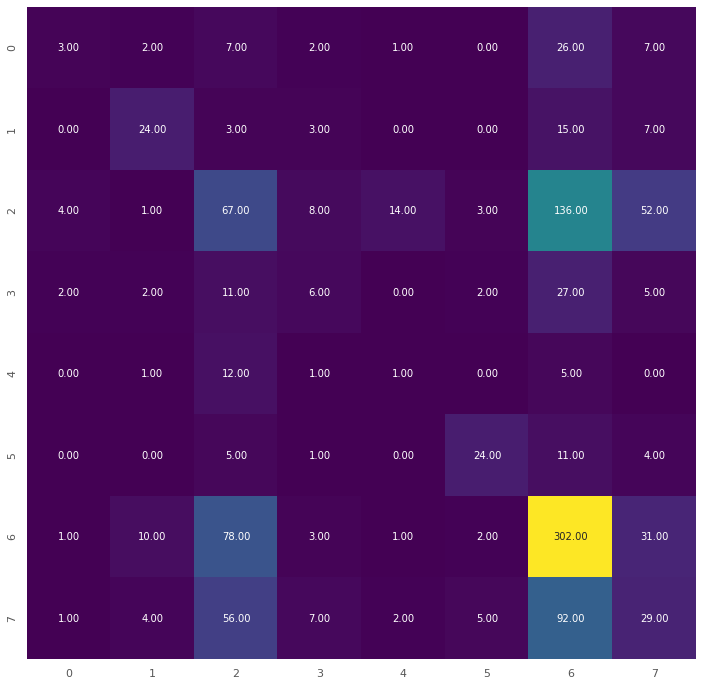

In [70]:
plt.figure(figsize=(12,12))
sns.heatmap(cnf,annot=True,cmap='viridis',fmt='.2f',cbar=False)
plt.show()